# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [18]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime 
import requests

In [20]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [23]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser = Browser('chrome')
browser.visit(url)

# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [26]:
#Collect the HTML
html = browser.html

# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [28]:
# Extract all rows of data
row_data = soup.find_all('table', class_='table')
row_data

[<table class="table">
 <tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [31]:
#Scrape the data
table_rows = soup.find_all('tr')

In [35]:
# Create an empty list
empty_list = []

# Loop through the scraped data to create a list of rows
for row in table_rows:
    cols = row.find_all('td')  # Find all columns in the current row
    if cols:  
        row_data = [
            int(cols[0].text.strip()),  # id
            cols[1].text.strip(),        # terrestrial_date
            int(cols[2].text.strip()),   # sol
            float(cols[3].text.strip()), # ls
            int(cols[4].text.strip()),    # month
            float(cols[5].text.strip()), # min_temp
            float(cols[6].text.strip())   # pressure
        ]
        # Append the row data to the empty list
        empty_list.append(row_data)

print(empty_list)

[[2, '2012-08-16', 10, 155.0, 6, -75.0, 739.0], [13, '2012-08-17', 11, 156.0, 6, -76.0, 740.0], [24, '2012-08-18', 12, 156.0, 6, -76.0, 741.0], [35, '2012-08-19', 13, 157.0, 6, -74.0, 732.0], [46, '2012-08-20', 14, 157.0, 6, -74.0, 740.0], [57, '2012-08-21', 15, 158.0, 6, -78.0, 740.0], [68, '2012-08-22', 16, 158.0, 6, -77.0, 740.0], [79, '2012-08-23', 17, 159.0, 6, -76.0, 742.0], [112, '2012-08-27', 21, 161.0, 6, -74.0, 741.0], [114, '2012-08-28', 22, 162.0, 6, -74.0, 742.0], [123, '2012-08-29', 23, 162.0, 6, -75.0, 741.0], [134, '2012-08-30', 24, 163.0, 6, -75.0, 742.0], [145, '2012-08-31', 25, 163.0, 6, -75.0, 743.0], [156, '2012-09-01', 26, 164.0, 6, -76.0, 745.0], [163, '2012-09-02', 27, 164.0, 6, -75.0, 743.0], [170, '2012-09-03', 28, 165.0, 6, -75.0, 745.0], [171, '2012-09-04', 29, 166.0, 6, -75.0, 747.0], [172, '2012-09-05', 30, 166.0, 6, -74.0, 747.0], [173, '2012-09-06', 31, 167.0, 6, -74.0, 745.0], [175, '2012-09-08', 33, 168.0, 6, -73.0, 748.0], [176, '2012-09-10', 34, 168.

In [37]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(empty_list, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [39]:
# Confirm DataFrame was created successfully
mars_df.head (5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155.0,6,-75.0,739.0
1,13,2012-08-17,11,156.0,6,-76.0,740.0
2,24,2012-08-18,12,156.0,6,-76.0,741.0
3,35,2012-08-19,13,157.0,6,-74.0,732.0
4,46,2012-08-20,14,157.0,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [42]:
# Examine data type of each column
print("Data types of each column:")
print(mars_df.dtypes)

Data types of each column:
id                    int64
terrestrial_date     object
sol                   int64
ls                  float64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [44]:
# Change data types for data analysis

# Convert 'terrestrial_date' to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Convert 'id', 'sol', 'month' to int (if they are not already)
mars_df['id'] = mars_df['id'].astype(int)
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)

# Convert 'ls', 'min_temp', 'pressure' to float (if they are not already)
mars_df['ls'] = mars_df['ls'].astype(float)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

# Step 3: Verify the changes
print("\nData types after conversion:")
print(mars_df.dtypes)

# Display the DataFrame
print("\nDataFrame:")
print(mars_df)


Data types after conversion:
id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

DataFrame:
        id terrestrial_date   sol     ls  month  min_temp  pressure
0        2       2012-08-16    10  155.0      6     -75.0     739.0
1       13       2012-08-17    11  156.0      6     -76.0     740.0
2       24       2012-08-18    12  156.0      6     -76.0     741.0
3       35       2012-08-19    13  157.0      6     -74.0     732.0
4       46       2012-08-20    14  157.0      6     -74.0     740.0
...    ...              ...   ...    ...    ...       ...       ...
1862  1889       2018-02-23  1973  133.0      5     -78.0     730.0
1863  1892       2018-02-24  1974  134.0      5     -77.0     729.0
1864  1894       2018-02-25  1975  134.0      5     -76.0     729.0
1865  1893       20

In [46]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [49]:
# 1. How many months are there on Mars?
unique_months = mars_df['month'].nunique()
print(f"There are {unique_months} months on Mars.")

There are 12 months on Mars.


In [51]:
# 2. How many sols (Martian days) worth of data are there?
number_of_sols = mars_df['sol'].nunique()

# Count the total number of entries in the DataFrame
total_entries = mars_df.shape[0]  # This gives the total number of rows

print(f"There are {total_entries} entries in the dataset, representing Martian days.")

There are 1867 entries in the dataset, representing Martian days.


In [53]:
# 3. What is the average minimum temperature by month?
average_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
print("Average minimum temperature by month:")
print(average_min_temp_by_month)

Average minimum temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


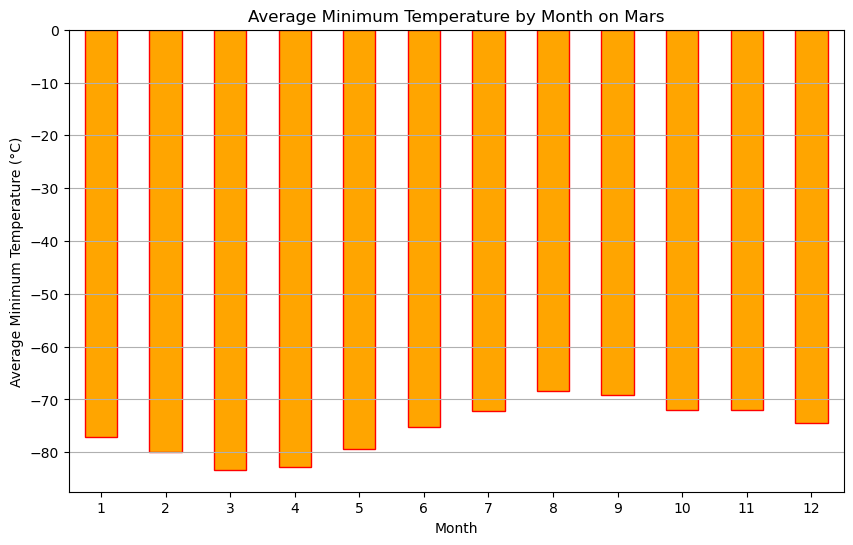

In [104]:
# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))  # Set the figure size
average_min_temp_by_month.plot(kind='bar', color='orange', edgecolor='red')

plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)  
plt.grid(axis='y') 
plt.savefig('1_average minimum temperature by month.png')
plt.show()

The coldest month is Month 3 with an average minimum temperature of -83.31 °C.
The hottest month is Month 8 with an average minimum temperature of -68.38 °C.


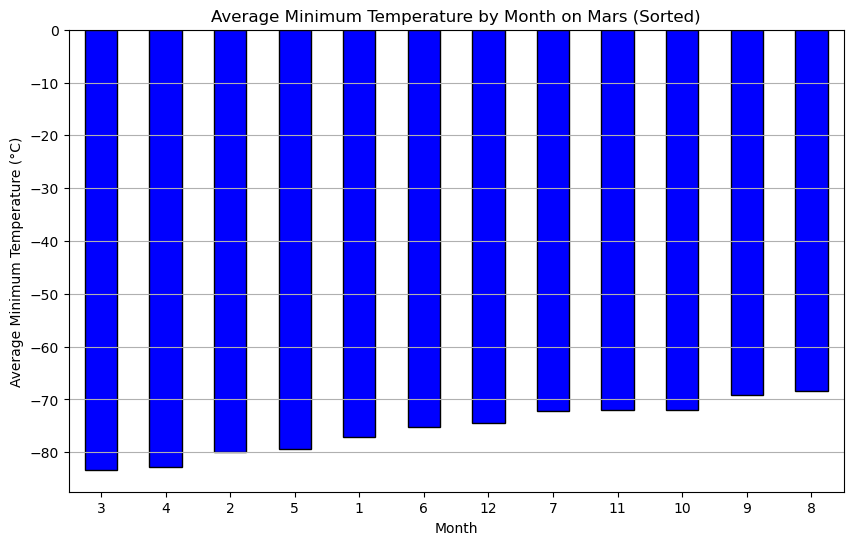

In [106]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the average minimum temperature
sorted_avg_min_temp = average_min_temp_by_month.sort_values()

# Step 3: Identify the coldest and hottest months
coldest_month = sorted_avg_min_temp.idxmin()
hottest_month = sorted_avg_min_temp.idxmax()
coldest_temp = sorted_avg_min_temp.min()
hottest_temp = sorted_avg_min_temp.max()

print(f"The coldest month is Month {coldest_month} with an average minimum temperature of {coldest_temp:.2f} °C.")
print(f"The hottest month is Month {hottest_month} with an average minimum temperature of {hottest_temp:.2f} °C.")

# Plott the sorted average minimum temperature by month
plt.figure(figsize=(10, 6))  
sorted_avg_min_temp.plot(kind='bar', color='blue', edgecolor='black')

plt.title('Average Minimum Temperature by Month on Mars (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.savefig('2_coldest and hottest months 2.png')
plt.show()


Average atmospheric pressure by month on Mars:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


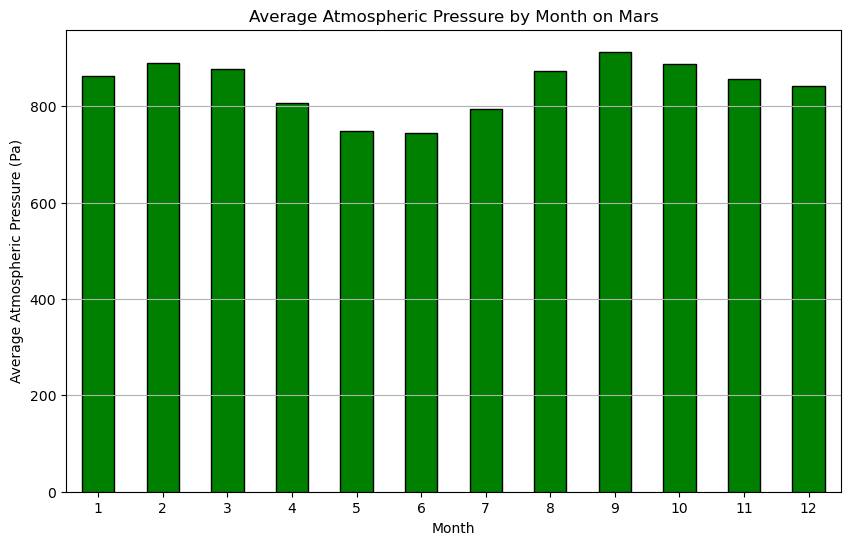

In [108]:
# Group by and calculate the average atmospheric pressure
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
print("Average atmospheric pressure by month on Mars:")
print(average_pressure_by_month)

# Plot the average atmospheric pressure by month
plt.figure(figsize=(10, 6)) 
average_pressure_by_month.plot(kind='bar', color='green', edgecolor='black')

plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0) 
plt.grid(axis='y')  
plt.savefig('3_average atmospheric pressure.png')
plt.show()

The month with the lowest pressure is Month 6 with an average pressure of 745.05 Pa.
The month with the highest pressure is Month 9 with an average pressure of 913.31 Pa.


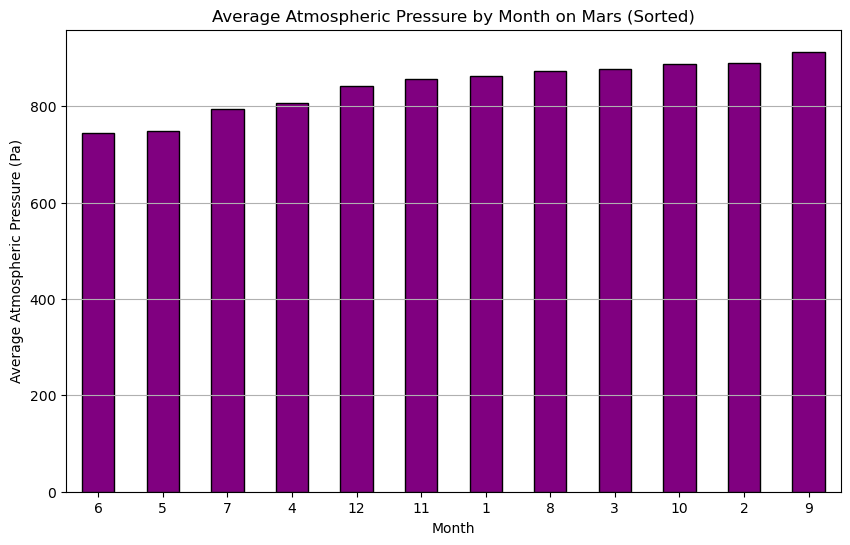

In [110]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Group by and calculate the average atmospheric pressure
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()

# Sort the average atmospheric pressure
sorted_avg_pressure = average_pressure_by_month.sort_values()

# Identify the lowest and highest pressure months

lowest_pressure_month = sorted_avg_pressure.idxmin()
highest_pressure_month = sorted_avg_pressure.idxmax()
lowest_pressure = sorted_avg_pressure.min()
highest_pressure = sorted_avg_pressure.max()

print(f"The month with the lowest pressure is Month {lowest_pressure_month} with an average pressure of {lowest_pressure:.2f} Pa.")
print(f"The month with the highest pressure is Month {highest_pressure_month} with an average pressure of {highest_pressure:.2f} Pa.")

# Plot the bar chart  

plt.figure(figsize=(10, 6))  
sorted_avg_pressure.plot(kind='bar', color='purple', edgecolor='black')

plt.title('Average Atmospheric Pressure by Month on Mars (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)  
plt.grid(axis='y') 
plt.savefig('4_lowest and highest pressure months.png')
plt.show()


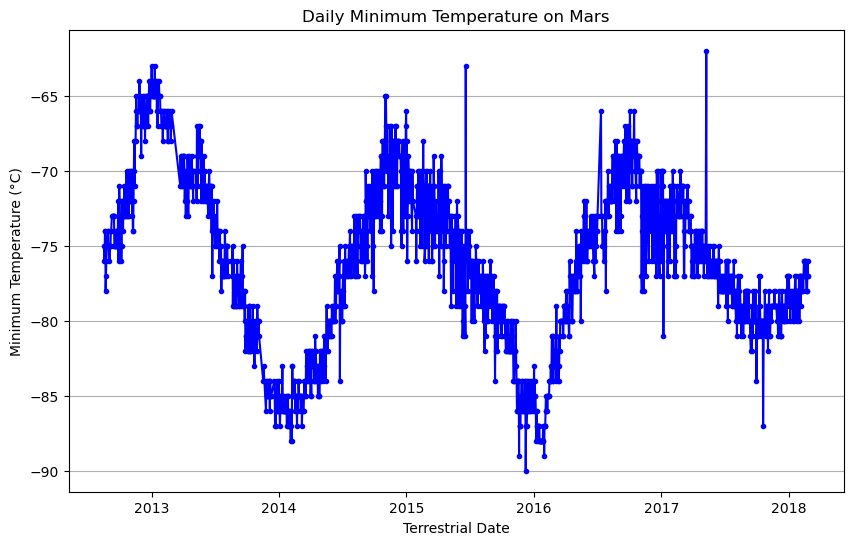

In [112]:
# How many terrestrial (Earth) days are there in a Martian year?
# Create the dterrestrial datetime format
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

#Sort the DataFrame by 'terrestrial_date' to ensure the plot is in order
mars_df = mars_df.sort_values('terrestrial_date')

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10, 6))  
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'], marker='o', linestyle='-', color='blue', markersize=3)

plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.savefig('5_terrestrial (Earth) days .png')
plt.show()

#### Minimum Temperature

With the third month having the coldest minimum temperature  of -83.31 °C.  and the eight month having the wormest minimum temp of -68.38 °C.helps us to undrstand seasonal variations on Mars. 

#### Atmospheric Pressure

The lowest atmospheric pressure occures in the sixth month with an average pressure of 745.05 Pa., while the highest occures in ninth month with an average pressure of 913.31 Pa. This can helps us to undersand better Martian weather patterns and conditions. 

#### Year Length
The Martian year according the temerature plot is close to 675 earth days, confirming that a Martian year is approximately 687 Earth days aligns well with scientific consensus. There are 1867 entries in the dataset, representing Martian days.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [91]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False, header=True)

In [93]:
browser.quit()